# Practica de regresión-14 de Agosto 2024

Usaremos el  conjunto de datos "Housing" del repositorio de aprendizaje automático de la Universidad de California en Irvine.

Este conjunto de datos contiene 506 registros y 14 atributos, que incluyen información como la tasa de impuesto a la propiedad, la proporción de habitaciones por vivienda ocupada, la tasa de criminalidad per cápita, entre otros.

1. CRIMEN: tasa de delincuencia per cápita por ciudad

2. TERRENOS: proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados

3. INDUSTRIA: proporción de acres de negocios no minoristas por ciudad

4. RIO: variable ficticia del río Charles (= 1 si la parcela limita con el río; 0 en caso contrario)

5. OXN: concentración de óxidos nítricos (partes por cada 10 millones)

6. NUM_HAB: número promedio de habitaciones por vivienda

7. UNI_OC: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

8. DIS: distancias ponderadas a cinco centros de empleo de Boston

9. IND_RAD: índice de accesibilidad a carreteras radiales

10. TAX: tasa de impuesto sobre la propiedad de valor total por cada $10,000

11. EST_PROF: relación alumno-maestro por ciudad

12. PROP_N 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

13. EST_SOC_B: % de estatus social bajo de la población

14. PRE_VIV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

In [3]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
    header=None, # especificamos que el dataset no tiene headers.
    sep='\s+') # especificamos que la separacion esta hecha por espacios y no por comas.

df.columns = ["CRIMEN","TERRENOS","INDUSTRIA" , "RIO" ,"OXN","NUM_H" ,"UNI_OC","DIS", "IND_RAD","TAX", "EST_PROF", "PROP_N" , "EST_SOC_B" , "PRE_VIV"]

df.head()

,CRIMEN,TERRENOS,INDUSTRIA,RIO,OXN,NUM_H,UNI_OC,DIS,IND_RAD,TAX,EST_PROF,PROP_N,EST_SOC_B,PRE_VIV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


El algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn con las siguientes variables:
 * DIS: distancias ponderadas a cinco centros de empleo de Boston.
 * INDUSTRIA: proporción de acres de negocios no minoristas por ciudad.
 * CRIMEN: tasa de delincuencia per cápita por ciudad.
 * NUM_H: número promedio de habitaciones por vivienda.
 * PREC_VIV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000).

### Glosario:
**Gráfico de correlación**:(también conocido como heatmap), es una herramienta visual que muestra la relación entre múltiples variables en un conjunto de datos.
Un gráfico de correlación es una visualización que ayuda a entender cómo las variables en un conjunto de datos se relacionan entre sí. La correlación mide la fuerza y la dirección de una relación lineal entre dos variables. Los valores de correlación varían de -1 a 1:
  *  1: Correlación positiva perfecta.
  * -1: Correlación negativa perfecta.
  *  0: Sin correlación.
    
**Seaborn**: es una biblioteca de visualización de datos en Python basada en Matplotlib. Está diseñada para hacer que la creación de gráficos estadísticos sea más fácil y atractiva, proporcionando una interfaz de alto nivel para la creación de visualizaciones complejas y estilizadas.

**Pairplot**: es una función de Seaborn que crea una matriz de gráficos de dispersión para visualizar las relaciones entre todas las combinaciones de variables en un DataFrame. Es especialmente útil para la exploración de datos, ya que permite ver rápidamente cómo se relacionan diferentes variables entre sí.

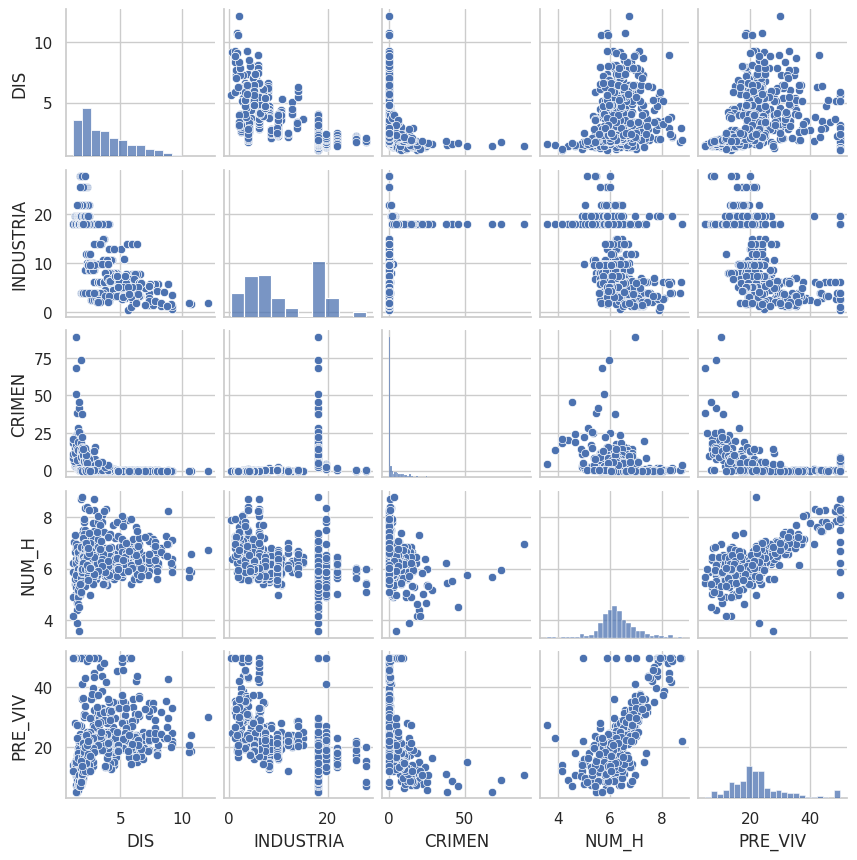

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["DIS", "INDUSTRIA", "CRIMEN", "NUM_H","PRE_VIV"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(df[cols], height=1.75);

La distribución de la variable PRE_VIV, podemos ver que se asemeja a una distribución normal. ESto nos servirá pues MEDV es la variable objetivo que se desea predecir. Si la variable objetivo sigue una distribución normal, es más fácil construir un modelo que pueda predecir su valor.

Además, la variable NUM_H también muestra un similitud a una distribución normal. Por otro lado se puede observar una tendencia lineal positiva entre NUM_H y PRE_VIV, lo que sugiere que a medida que aumenta el valor de NUM_H, también aumenta el valor de PRE_VIV. Por lo tanto, se podría utilizar esta relación para construir un modelo de regresión lineal que prediga el valor de PRE_VIV en función de NUM_H.

Aún más  podemos calcular la correlación numérica para determinar si es significativa. Asimismo, en cuanto a los valores atípicos, es necesario analizar numéricamente su impacto en las medidas estadísticas y determinar si deben ser excluidos o si representan información importante.

<Axes: >

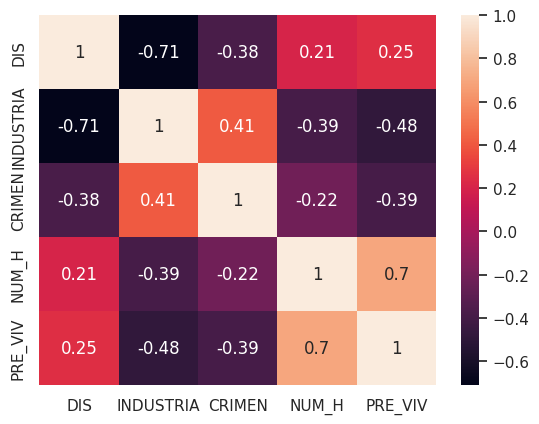

In [7]:
sns.heatmap(
    data=df[cols].corr(), 
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

Se observa que la correlación entre las variables RM y MEDV es positiva y relativamente alta. Es decir ue a medida que aumenta el número promedio de habitaciones por vivienda (NUM_HAB), tiende a aumentar el valor medio de las viviendas ocupadas  (PRE_VIV).

La correlación entre INDUSTRIA y DIS es negativa, es decir, esto podría indicar que a medida que una ciudad tiene una mayor cantidad de negocios no minoristas, es más probable que se encuentre cerca de los centros de empleo de Boston.
Haremos el modelo de regresión lineal simple para predecir el precio de una casa (variable dependiente) en función del promedio de habitaciones (variable independiente).


### Glosario:

**sklearn**: biblioteca de Python popular para machine learning y data mining. Proporciona herramientas simples y eficientes para el análisis predictivo y el modelado de datos. Es ampliamente utilizada tanto en la investigación como en la producción debido a su versatilidad y facilidad de uso.
Características Principales de Scikit-learn
Modelos de Machine Learning:
* Clasificación: Algoritmos para predecir la categoría a la que pertenece un dato, como LogisticRegression, RandomForestClassifier, y Support Vector Machine (SVM).
* Regresión: Algoritmos para predecir valores continuos, como LinearRegression, Ridge, y SVR (Support Vector Regression).
* Clustering: Técnicas para agrupar datos en clusters, como KMeans y DBSCAN.
* Reducción de Dimensionalidad: Métodos para reducir la cantidad de variables, como PCA (Principal Component Analysis) y LDA (Linear Discriminant Analysis).

Text(0, 0.5, 'Mediana del precio de las casas x1000 (PRE_VIV)')

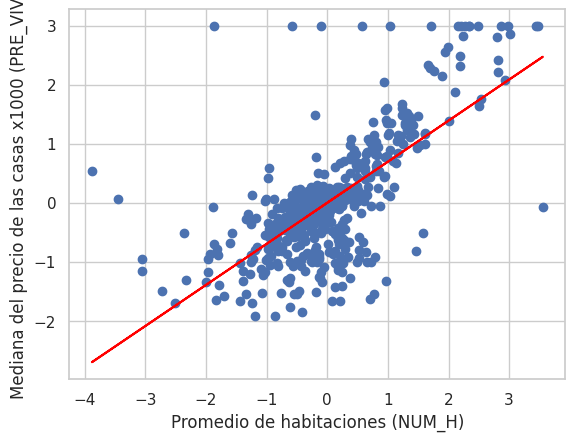

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Guardamos los datos de interes en una variable x e y
x = df['NUM_H'].values.reshape(-1,1) # variable independiente
y = df['PRE_VIV'].values.reshape(-1,1) # variable dependiente
#Convierte las columnas en arrays NumPy y los remodela para que sean vectores columna (2D con una sola columna). Es necesario porque 
#scikit-learn esperan que los datos de entrada tengan dos dimensiones.

# instanciamos el modelo de escalamiento para transformar los datos a una escala común para mejorar el rendimiento del aprendizaje automático.
# StandardScaler se utiliza para estandarizar los datos. La estandarización transforma los datos para que tengan una media de 0 y una desviación estándar de 1.
sc_x = StandardScaler()
sc_y = StandardScaler()
# fit: Ajusta el escalador a los datos x/y. Calcula los parámetros necesarios para la transformación, como la media y la desviación estándar de cada característica en x/y
# transform: Aplica la transformación a los datos utilizando los parámetros calculados durante el ajuste (fit). En el caso del StandardScaler, esto implica restar la media y dividir por la desviación estándar.
x_standard = sc_x.fit_transform(x)
y_standard = sc_y.fit_transform(y)
 
# Instanciamos y ajustamos el modelo de regresión lineal
slr = LinearRegression() #  Crea una instancia del modelo de regresión lineal
slr.fit(x_standard,y_standard) # Ajusta el modelo de regresión lineal a los datos estandarizados x_standard y y_standard

plt.scatter(x_standard, y_standard)# Crea un gráfico de dispersión de los datos estandarizados.
plt.plot(x_standard, slr.predict(x_standard), color='red') #  Traza la línea de regresión ajustada en el gráfico. slr.predict(x_standard) genera las predicciones del modelo sobre los datos estandarizados.

plt.xlabel("Promedio de habitaciones (NUM_H)")
plt.ylabel("Mediana del precio de las casas x1000 (PRE_VIV)")

In [15]:
import numpy as np

# Representamos el numero de habitaciones de la casa que queremos predecir
num_habitaciones = 5

# Estandarizamos sc_x para predecir el precio de la casa
num_habitaciones_standard = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))

# Usamos la transformada inversa en el resultado para volver a la escala original 
result = sc_y.inverse_transform(slr.predict(num_habitaciones_standard))
print("El precio de una casa con 5 habitaciones en Boston es de", result*1000)

El precio de una casa con 5 habitaciones en Boston es de [[10839.92412946]]


### Glosario:

**LinearRegression()**:


## ALGUNAS MEDIDAS COMUNES PARA EVALUAR EL RENDIMIENTO DE LOS MODELOS DE REGRESIÓN:
1. El **MSE o Error Cuadrático Medio**, es una medida  utilizada para evaluar el rendimiento de modelos de regresión. El MSE es el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.
Para calcular el MSE, puedes seguir los siguientes pasos:

   * Calcula el error al cuadrado (la diferencia entre la predicción del modelo y el valor real, al cuadrado) para cada punto de datos.
   * Suma todos los errores al cuadrado.
   *  Divide la suma de errores al cuadrado por el número de puntos de datos para obtener el MSE.

La fórmula para calcular el MSE es:

$$
MSE=\ \displaystyle\frac{1}{n} \sum (y_i - \hat{y}_i)^2
$$
Donde:

* n es el número de puntos de datos.
* $y_i$ es el valor real del i-ésimo punto de datos.
* $\hat{y}_i$ es la predicción del modelo para el i-ésimo punto de datos.
2. El **coeficiente de determinación $R^2$**: es una medida que indica cuánto del cambio en la variable dependiente (la que estás tratando de predecir) puede ser explicado por el modelo de regresión en relación con la variable independiente (la que estás usando para hacer la predicción). $R^2$ varia entre 0 y 1. 0 significa que el modelo no explica nada de la variabilidad en la variable dependiente. En otras palabras, el modelo no es mejor que simplemente usar la media de los precios de las casas para hacer predicciones. 1 significa que el modelo explica toda la variabilidad en la variable dependiente. En este caso, las predicciones del modelo son perfectas.
  
Interpretación Simple
 
Imagina que estás tratando de predecir el precio de las casas en función del número de habitaciones. Después de ajustar un modelo de regresión, quieres saber qué tan bien se ajusta ese modelo a los datos reales.$R^ 2= 0.8: Esto significa que el modelo explica el 80% de la variabilidad en la variable dependiente (en nuestro ejemplo, los precios de las casas). El 20% restante de la variabilidad no está explicado por el modelo.

Un  más alto indica un mejor ajuste del modelo a los datos.

### EJEMPLO DE REGRESIÓN LINEAL MULTIVARIABLE
_Recordatorio:_  La regresión lineal multivariable es una técnica estadística utilizada para modelar la relación entre una variable de respuesta (Y) y dos o más variables predictoras o independientes ($X_i$). Esta técnica se utiliza para predecir la variable de respuesta basada en las variables predictoras.

Por ejemplo, se puede utilizar para predecir el precio de una casa basado en su tamaño, número de habitaciones, ubicación, etc.

Retomaremos el  dataset "Housing" para  predecir el valor medio de las viviendas en diferentes zonas de Boston (PRE_VIV).

COmo primer paso buscaremos las variables que tengan la mayor correlación con nuestra variable de respuesta "PRE_VIV". A partir de esto, podremos seleccionar un conjunto de variables predictoras que nos permitan construir un modelo de regresión lineal múltiple que tenga una alta capacidad predictiva, que pueda ser utilizado para estimar los valores de "PRE_VIV" en otras zonas de Boston.

<Axes: >

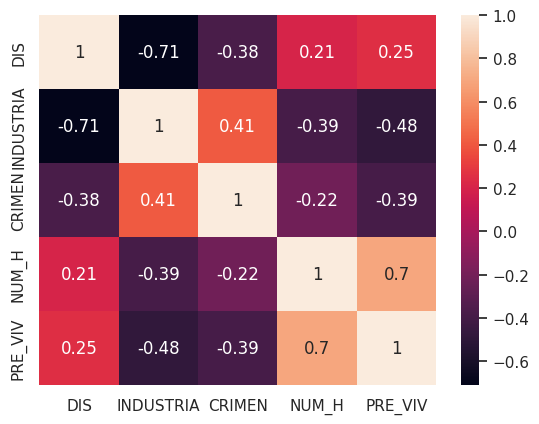

In [18]:
sns.heatmap(
    data=df[cols].corr(), 
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

Las variables que tienen la correlación más fuerte con nuestra variable de respuesta "PRE_VIV" son la cantidad promedio de habitaciones por vivienda (NUM_H) y la proporción de acres de negocios no minoristas por ciudad (INDUSTRIA).